In [1]:
import scipy as py
import matplotlib.pyplot as plt
import os
from matplotlib import pyplot
from PIL import Image
from scipy import misc
import cv2
from cv2 import imread, imshow
import numpy as np
import glob
from scipy import signal
import csv 

In [2]:
### Test Recording of Person 
test_person = cv2.VideoWriter("lolol.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 30, (640,480))

video = cv2.VideoCapture(0)
cascPath = 'haarcascade_frontalface_default.xml'
faceCasc = cv2.CascadeClassifier(cascPath)
this_dick = 30 

while True : 
    
    ## Read Next frame.
    read_success, frame = video.read()
    if not read_success:
        print('Cannot read video file!')
        break 
    
    
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
#     face_detect = faceCasc.detectMultiScale( gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(this_dick,this_dick), flags=cv2.CASCADE_SCALE_IMAGE)
    
#     for (x,y,w,h) in face_detect : 
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2 )
#         cv2.putText(frame, "Width:  " + str(w), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
#         cv2.putText(frame, "Height:  " + str(h), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
        
        
    cv2.imshow("ECE420", frame)
    test_person.write(frame)  
    
    key = cv2.waitKey(1) & 0xff

    if key == 13:
        break ; 
        
cv2.destroyAllWindows()
test_person.release()

In [34]:
### Construct video from ChokeDataSet 
test_video = cv2.VideoWriter("real_test.mp4", cv2.VideoWriter_fourcc(*'MP4V'), 30, (800,600) )

for filename in glob.glob("Test_Video/P1L_S1_C1/*.jpg") : 
    frame = cv2.imread(filename) 
    test_video.write(frame)

test_video.release() 
    

0 10


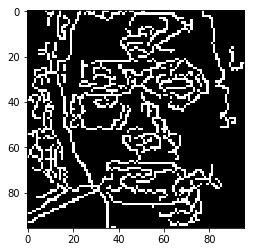

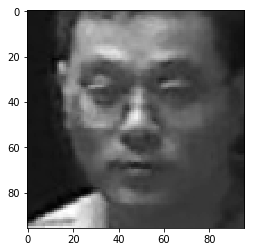

Number Loaded:  10
10 20


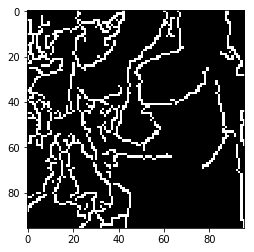

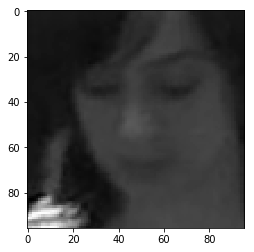

Number Loaded:  10
20 30


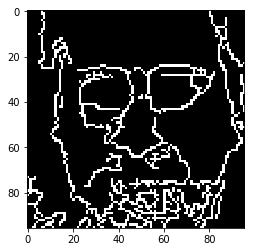

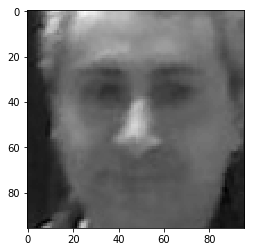

Number Loaded:  10


In [2]:
### Step 1: Load in Image, Flatten them, Obtain Mean Face and Subtract 

## Lets take out 6 individual frames for each person and test say on a random frame (Note we will train it prior)
person = ["0001", "0003", "0004", "0005", "0006", "0007", "0009", "0010", "0011", "0012", "0013", "0014", "0015", "0016", "0017",
         "0018", "0019", "0020", "0021", "0022", "0023", "0024", "0025", "0026", "0027"]


person = ["0001", "0004", "0005", "0006", "0007", "0009", "0010", "0011", "0012", "0013", "0014", "0015", "0016", "0017",
         "0018", "0019", "0020", "0021", "0022", "0023", "0024", "0025", "0026", "0027"]
### Removed 
assigned_person = []
person_im = []

# frame_start = [483, 3050, 3750, 3230, 2815, 4073]
# test_frame = [481, 3070, 3745, 3235, 2820, 4080 ]

skip_frame = 1
indiv_image = 10
total_images = len(person) * indiv_image 

## Change value here
total_images = 4 * indiv_image 
counter = 0 

### Row = Image, Col = Person 
full_train_image = np.zeros((96*96, total_images)) 

for i in range( len(person) ) : 
    
    ### Checking if frame is 3 digit or 4 digit 
    
    person_img = 0 
    
    if (counter+1) * indiv_image == total_images : 
        break 
    counter += 1 
    
    for filename in glob.glob("P1E_S1_C1/" + person[i] + "/*.pgm") : 
        test_im = imread(filename, 0)
        test_im = cv2.Canny( cv2.equalizeHist(test_im), 5,230 )  
        full_train_image[:, i*indiv_image+person_img] = test_im.flatten() 
        person_img += 1 
        
        if person_img == indiv_image : 
            print( str(i*indiv_image) + " " + str(i*indiv_image+person_img) ) 
            plt.imshow(test_im,  cmap = plt.cm.gray)
            plt.show()
            
            plt.imshow( imread(filename,0), cmap=plt.cm.gray )
            plt.show()
            
            person_im.append(test_im)
            assigned_person.append(indiv_image * i )
            break 
            
    print("Number Loaded: ", person_img)
#         plt.imshow(test_im,  cmap = plt.cm.gray)
#         plt.show() 
        


#     if frame_start[i] / 1000 < 1 : 
#         string_part = "00000"
#     else : 
#         string_part = "0000"
    
#     ### 5 Individual Frames to add for training. Increment frames by 5. Loading it in grayscale  
#     for j in range(indiv_image) : 
#         #print(person[i])
#         test_im = imread("P1E_S1_C1/" + person[i] + "/" + string_part + str(frame_start[i] + skip_frame*j) + ".pgm", 0)
#         plt.imshow(test_im,  cmap = plt.cm.gray)
#         plt.show() 
#         ### If file fails 
#         if test_im is None : 
#             print("Lilith Died")
#         else : 
#             full_train_image[:, i*indiv_image+j] = test_im.flatten() 

yo yo 


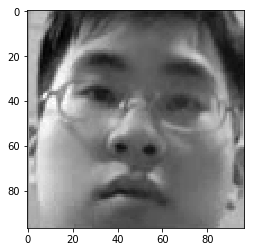

yo yo 


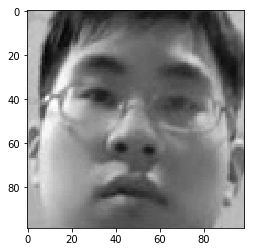

yo yo 


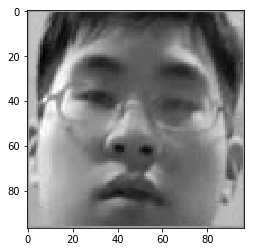

yo yo 


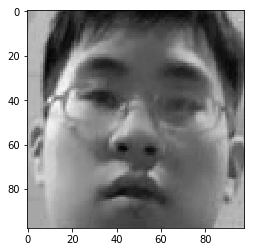

yo yo 


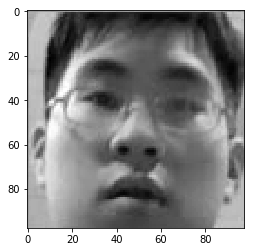

yo yo 


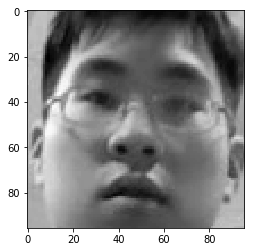

yo yo 


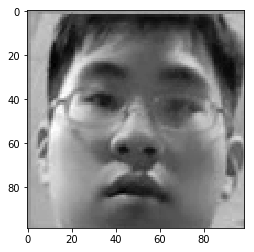

yo yo 


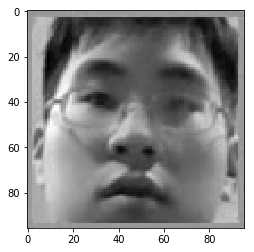

yo yo 


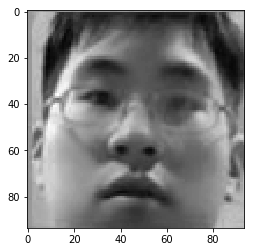

yo yo 


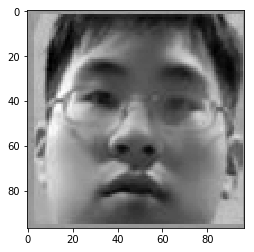

Cannot read video file!


In [3]:
### Get Facial Feature from Live Video Test 
video = cv2.VideoCapture("christest.mp4")

cascPath = 'haarcascade_frontalface_default.xml'
faceCasc = cv2.CascadeClassifier(cascPath)
good_frame = 0 

while True : 
    ## Read Next frame.
    read_success, frame = video.read()

    if not read_success :
        print('Cannot read video file!')
        break 
        
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
    
    ## FaceCasc Facial Detection 
    face_detect = faceCasc.detectMultiScale( gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)
    
    full_str = ''
    
    for (x,y,w,h) in face_detect : 
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2 )
        full_str += str(x) + ' ' + str(y)
        
        cv2.putText(frame, "Width:  " + str(w), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
        cv2.putText(frame, "Height:  " + str(h), (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
        
        
        if ( 90 < w < 100 ) and (90 < h < 100 ) and (good_frame < indiv_image ) : 
            test_im = cv2.resize(gray_image[y:y+h, x:x+w], (96,96))
            test_im = cv2.Canny( cv2.equalizeHist(test_im), 5,230 )  ### Remember to change this 
            full_train_image[:, 3*indiv_image+good_frame] = test_im.flatten()  ### Remember to change this 
            
            
            #### OWOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO DON"T FORGET ##### 
            
            good_frame += 1 
            print("yo yo ")
            
            plt.imshow( gray_image[y:y+h, x:x+w], cmap = plt.cm.gray  )
            plt.show()           


    key = cv2.waitKey(1) & 0xff
    
    if key == 13:
        break ; 
    
    cv2.imshow("ECE_420", frame)
    
cv2.destroyAllWindows()
video.release()

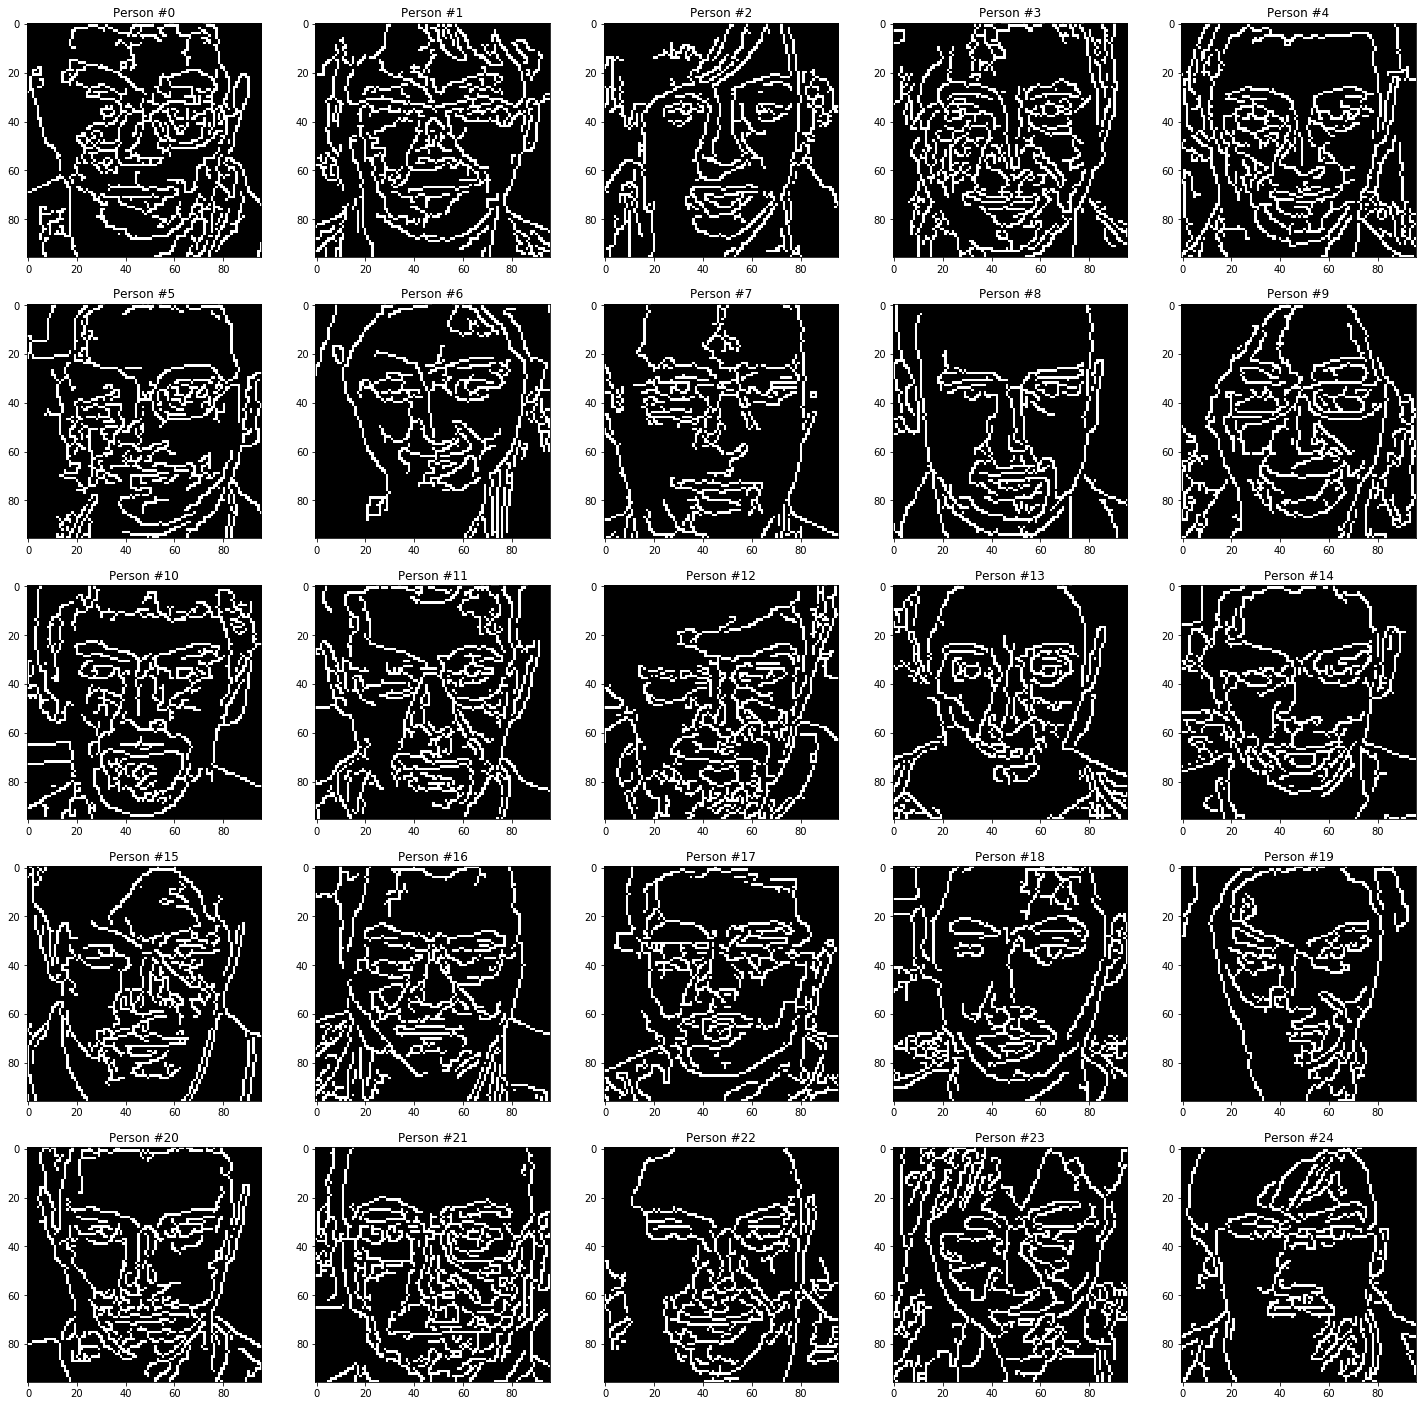

In [31]:
row = 5 
col = 5
fig = plt.figure(figsize=(25, 25)) 

for i in range (row) : 
    for j in range (col) : 
        plt.subplot(5,5,i*5+j+1)
        plt.imshow(person_im[i*5+j], cmap = plt.cm.gray)
        plt.title("Person #%d" %(i*5+j) )

plt.show()

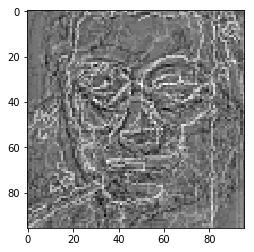

In [4]:
#Initialize: k=5, skip=2, indiv=6  : 33.33%
k = 5

# plt.imshow(test_im,  cmap = plt.cm.gray)
# plt.show() 

av_vect = np.zeros( (96*96, 1))
av_vect[:,0] = np.sum(full_train_image, axis = 1) / total_images

sub_mean_image = full_train_image - av_vect


### Step 2: Calculate Covariance Matrix/ Obtain highest k eigenvectors based on eigenvalues 
cov = np.dot(sub_mean_image.T, sub_mean_image )
w, v, vh = np.linalg.svd(cov) ### returns eigenvalues/eigenvectors normalized 

highest_eigen = np.flip(np.argsort(w) ) 
highest_eigenvector = np.zeros( (total_images, k) )

for i in range(k) : 
    highest_eigenvector[:,i] = v[highest_eigen[i]] 

eigenface = np.dot(sub_mean_image, highest_eigenvector) ## or u 

test = eigenface[:,1] 
test = np.reshape( test, (96,96) )
plt.imshow(test, cmap = plt.cm.gray)
plt.show() 

 


In [22]:
# def insert_line( file_name, line ) : 
#     with open('train_face.csv', 'a', newline='') as csvfile:
#         spamwriter = csv.writer(csvfile, delimiter=' ',
#                                 quotechar='|', quoting=csv.QUOTE_MINIMAL)

#         csvfile.write(line+"\n")
#         return     

print(eigenface.shape)
print(sub_mean_image.shape)
print(av_vect.shape)

line = ""

for i in range(sub_mean_image.shape[1] ) : 
    if i == sub_mean_image.shape[1] - 1 : 
        line += "0"
    else : 
        line += "0,"
    

print(line)

np.savetxt("train_face.csv", eigenface, delimiter=",", header="0,0,0,0,0")
np.savetxt("sub_mean_face.csv", sub_mean_image, delimiter=",", header = line)
np.savetxt("av_vect.csv", av_vect, delimiter=",", header = "0")


print("Successful Write")



(9216, 5)
(9216, 40)
(9216, 1)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Successful Write


In [5]:
print(sub_mean_image.shape)


(9216, 40)


In [28]:
cascPath = 'haarcascade_frontalface_default.xml'
faceCasc = cv2.CascadeClassifier(cascPath)
video = cv2.VideoCapture(0)

this_dick = 30

while True : 
    ## Read Next frame.
    read_success, frame = video.read()

    if not read_success:
        print('Cannot read video file!')
        break     
    
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
    face_detect = faceCasc.detectMultiScale( gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(this_dick,this_dick), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x,y,w,h) in face_detect : 
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2 )
        full_str += str(x) + ' ' + str(y)
        
        
        ### Get Weight for Train Image 
        test_im = cv2.resize(gray_image[y:y+h, x:x+w], (96,96))
        test_im = cv2.Canny( cv2.equalizeHist(test_im), 5,230 )  ### Remember to change this 
        weight_train = np.dot(eigenface.T, sub_mean_image)

    #         plt.imshow(test_im, cmap = plt.cm.gray)
    #         plt.show() 

        ### Get Weight for Test Image
        test_im_mean = test_im.reshape((96*96,1)) - av_vect 
        weight_test = np.dot(eigenface.T, test_im_mean)

        #print(weight_test.shape)
        total_error = [] 

        for j in range (total_images) : 
            error = np.linalg.norm( weight_train[:,j] - weight_test)
            total_error.append(error)

        ### Classification 
        classify = np.argmin(total_error)
        person_num = str( int(np.floor(classify/10) ) )
        
        
        cv2.putText(frame, "Whats this " + str(classify) + " " + person_num , (10,120), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255,255,255), 2)
        
    
    cv2.imshow("ECE420", frame)
    
    key = cv2.waitKey(1) & 0xff
    if key == 13:
        break ; 

cv2.destroyAllWindows()

In [33]:
### Load in HaarCascade XML 
cascPath = 'haarcascade_frontalface_default.xml'
faceCasc = cv2.CascadeClassifier(cascPath)
#video = cv2.VideoCapture(0)

video = cv2.VideoCapture('real_test.mp4')
label = [11, 17, 4, 8, 3, 24, 23, 15, 6, 18, 16, 5, 9, 12, 14, 13, 10, 2, 0, 1, 19, 7, 21, 22, 20  ]
frame_start = [86, 241, 383, 533, 676, 843, 963, 1078, 1212, 1347, 1480, 1613, 1754, 1890, 2016, 2140, 2268, 2463, 2579, 2710, 2865, 2996, 3122, 3277, 3430]
label_num = 0 
frame_num = 0 

height_temp = 0 
width_temp = 0 
height_lim = 50 
width_lim = 50 

curr_identify = label[0]
next_identify_index = 0

succ_video = []
succ_person = []
detect_me = 0 
num_skip_frame = 0 
this_dick = 30

test_frame_skip = 80

while True : 
    
    ## Read Next frame.
    read_success, frame = video.read()
    
    if not read_success:
        print('Cannot read video file!')
        break 
        
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY )
    
    ## FaceCasc Facial Detection 
    
    face_detect = faceCasc.detectMultiScale( gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(this_dick,this_dick), flags=cv2.CASCADE_SCALE_IMAGE)
    
    full_str = ''
    classify = ''
    person_num = ''
    
#     print(next_identify_index)
    if frame_num > frame_start[next_identify_index] : 
        curr_identify = label[next_identify_index]
    
        
        if next_identify_index != 24 : 
            next_identify_index += 1 
        
        if next_identify_index != 1 : 
            succ_video.append(succ_person)
            succ_person = []
    
#     if num_skip_frame > test_frame_skip and len(face_detect) != 0  :
#         test_frame_skip = 10
#         succ_video.append( succ_person )
#         succ_person = [] 

#         curr_identify = label[next_identify_index]
#         next_identify_index += 1 
#         num_skip_frame = 0
        
#         print(frame_num)
#         print(curr_identify)
    
#     if len(face_detect) == 0  : 
#         num_skip_frame += 1 
    
#     print("omfg: ", num_skip_frame)
    
    for (x,y,w,h) in face_detect : 
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2 )
        full_str += str(x) + ' ' + str(y)
 
        ### Identification 


#         print(w)
#         print(h)
        ### test_im = gray_image[y:y+96, x:x+96] 

        ### Get Weight for Train Image 
        test_im = cv2.resize(gray_image[y:y+h, x:x+w], (96,96))
        test_im = cv2.Canny( cv2.equalizeHist(test_im), 5,230 )  ### Remember to change this 
        weight_train = np.dot(eigenface.T, sub_mean_image)
        
#         plt.imshow(test_im, cmap = plt.cm.gray)
#         plt.show() 

        ### Get Weight for Test Image
        test_im_mean = test_im.reshape((96*96,1)) - av_vect 
        weight_test = np.dot(eigenface.T, test_im_mean)

        #print(weight_test.shape)
        total_error = [] 

        for j in range (total_images) : 
            error = np.linalg.norm( weight_train[:,j] - weight_test)
            total_error.append(error)

        ### Classification 
        classify = np.argmin(total_error)
        person_num = str( int(np.floor(classify/30) ) )
        
        
        ### some amount of frames to detect before moving on to next person plz work
#         print("Detect Person: ", person_num)
        
        if h > height_lim and w > width_lim and curr_identify == int(person_num) : 
#             detect_me = 0 
            
            info = (curr_identify, h, w, frame_num, frame )
            succ_person.append(info)
            print(frame_num) 
            
            #print("OWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWOOOOOOOOOOOOO")
        
        
        
        
    
        break 
        

    cv2.putText(frame, "Whats this " + str(classify) + " " + person_num , (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
    cv2.putText(frame, "Frame: " + str(frame_num) , (10,100), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
    
    frame_num += 1 
    
    
    if frame_num > 3600 : 
        break ; 

#     ### Running the Video 
#     key = cv2.waitKey(0) & 0xff

#     if key == 13:
#         break ; 
        
#     cv2.imshow("ECE420", frame)
    
#     key = cv2.waitKey(1) & 0xff
    
#     # User Press Enter
#     if key == 13:
#         break ; 
        
#cv2.waitKey(0)
cv2.destroyAllWindows()


print("UWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWwWUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU")





# test_image = cv2.imread('P1E_S1_C1_PNG/00000289.jpg')
# print( test_image.shape )

# #cv2.imshow('I wonder', test_image )

# mean = np.sum( test_image, 1 )
# mean = np.sum( mean, 0) / (600 * 800)


# blob = cv2.dnn.blobFromImage(test_image, scalefactor=1.0, size=(224, 224), mean=(mean[0], mean[1], mean[2]) )



# # new_image = test_image - mean 
# # cv2.imshow("testing", new_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

585
603
606
612
613
615
618
619
620
630
632
635
1256
1257
1268
1269
1274
1278
1279
1285
1290
1291
1299
1300
1306
1308
1312
1386
1388
1391
1395
1402
1409
1411
1415
1419
1421
1422
1425
1428
1429
1437
1442
2917
2924
2929
2930
2933
2944
2945
2946
2948
2949
2951
2952
2953
2955
2956
2959
2960
2965
2970
3186
3193
Cannot read video file!
UWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWwWUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU


In [34]:
# print(len(label))

# print(frame_start[24])
# print(frame_num)
# plt.imshow(frame, cmap = plt.cm.gray)
# plt.show() 

for person in succ_video : 
    if len(person) == 0 : 
        continue 
    
    for frame in person : 
        print(frame[0:4])

(8, 58, 58, 585)
(8, 73, 73, 603)
(8, 76, 76, 606)
(8, 83, 83, 612)
(8, 83, 83, 613)
(8, 85, 85, 615)
(8, 92, 92, 618)
(8, 95, 95, 619)
(8, 98, 98, 620)
(8, 140, 140, 630)
(8, 152, 152, 632)
(8, 174, 174, 635)
(6, 51, 51, 1256)
(6, 51, 51, 1257)
(6, 58, 58, 1268)
(6, 58, 58, 1269)
(6, 62, 62, 1274)
(6, 64, 64, 1278)
(6, 64, 64, 1279)
(6, 71, 71, 1285)
(6, 78, 78, 1290)
(6, 80, 80, 1291)
(6, 97, 97, 1299)
(6, 101, 101, 1300)
(6, 126, 126, 1306)
(6, 132, 132, 1308)
(6, 132, 132, 1312)
(18, 51, 51, 1386)
(18, 53, 53, 1388)
(18, 52, 52, 1391)
(18, 55, 55, 1395)
(18, 62, 62, 1402)
(18, 68, 68, 1409)
(18, 76, 76, 1411)
(18, 78, 78, 1415)
(18, 84, 84, 1419)
(18, 86, 86, 1421)
(18, 87, 87, 1422)
(18, 92, 92, 1425)
(18, 96, 96, 1428)
(18, 94, 94, 1429)
(18, 141, 141, 1437)
(18, 171, 171, 1442)
(19, 52, 52, 2917)
(19, 58, 58, 2924)
(19, 60, 60, 2929)
(19, 60, 60, 2930)
(19, 62, 62, 2933)
(19, 72, 72, 2944)
(19, 76, 76, 2945)
(19, 73, 73, 2946)
(19, 74, 74, 2948)
(19, 77, 77, 2949)
(19, 78, 78, 2

In [ ]:
### Step 3: Facial Recognition: Read Image -> Subtract Mean -> Project onto Eigen Face 

accuracy = 0 
print(full_train_image.shape) 

for i in range ( len(test_frame) ) : 
    person_num = person[i]
    
    if i == 0 : 
        string_part = "00000"
    else : 
        string_part = "0000"
        
    test_im = imread("P1E_S1_C1/" + person_num + "/" + string_part + str(test_frame[i] ) + ".pgm", 0)
    
    print("Test Image")
    plt.imshow(test_im)
    plt.show() 

    ### Get Weight for Train Image 
    weight_train = np.dot(eigenface.T, sub_mean_image)

    ### Get Weight for Test Image
    test_im_mean = test_im.reshape((96*96,1)) - av_vect 
    weight_test = np.dot(eigenface.T, test_im_mean)

    #print(weight_test.shape)
    total_error = [] 

    for j in range (total_images) : 
        error = np.linalg.norm( weight_train[:,j] - weight_test)
        total_error.append(error)

    classify = np.argmin(total_error)
    #print(total_error)
    print(classify)
    #print( i*6)
    
    if classify >= i*10  and classify <= (i+1)*10 - 1 :
        accuracy += 1 
        
        
    #print(total_error)
#     print(classify)
    
    plt.imshow( full_train_image[:,classify].reshape( (96,96) ) ) 
    plt.show() 

print( accuracy/len(person))

In [8]:
import cv2
import sys

# Load video, 0 for webcam, str for path to video
video = cv2.VideoCapture(0)
# video = cv2.VideoCapture('test_clip.mp4')

# Exit if video not opened.
if not video.isOpened():
    print('Could not open video!')
    sys.exit()

# Tracker Variables
tracker = None
roi = (0, 0, 0, 0)
# -1 for not tracking, 0 for init tracking, 1 for update tracking
tracking_flag = -1

# Loop simulate Camera Preview Callback
while True:
    # Capture user Key Press to simulate App Control
    key = cv2.waitKey(1) & 0xff
    # User Press Enter
    if key == 13:
        # Not tracking
        if tracking_flag == -1:
            # Pause and let user select ROI
            roi = cv2.selectROI(frame, False)
            # Init tracking
            tracking_flag = 0
        # Is tracking
        if tracking_flag == 1:
            # Reset ROI
            roi = (0, 0, 0, 0)
            # Clear Tracker
            tracker.clear()
            # Stop tracking
            tracking_flag = -1
    # User Press ESC
    elif key == 27:
        break

    # Start timer
    start = cv2.getTickCount()

    # Read Next frame.
    read_success, frame = video.read()
    if not read_success:
        print('Cannot read video file!')
        break 

    if tracking_flag == -1:

        # Display Text
        cv2.putText(frame, "Press ENTER to select ROI!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)


    elif tracking_flag == 0:

        # Initialize KCF Tracker and Start Tracking
        # 1. Create a KCF Tracker
        # 2. Initialize KCF Tracker with grayscale image and ROI
        # 3. Modify tracking flag to start tracking
        # Your code starts here
        tracker = cv2.TrackerKCF_create()
        tracking = tracker.init(frame,roi)
        tracking_flag = 1


    else:

        # Update tracking result is succeed
        # If failed, print text "Tracking failure occurred!" at top left corner of the frame
        # Calculate and display "FPS@fps_value" at top right corner of the frame
        # Your code starts here
        track, roi = tracker.update(frame)
        if track:
            # Draw ROI Rectangle
            p1 = (int(roi[0]), int(roi[1]))
            p2 = (int(roi[0] + roi[2]), int(roi[1] + roi[3]))
            cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
        else:
            cv2.putText(frame, "Tracking failure occurred!", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
            
        cv2.putText(frame, "FPS@"+str(cv2.getTickFrequency() / (cv2.getTickCount() - start)), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)
    
    # Draw ROI Rectangle
    p1 = (int(roi[0]), int(roi[1]))
    p2 = (int(roi[0] + roi[2]), int(roi[1] + roi[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
    
    # Display result
    cv2.imshow("ECE420 Lab7", frame)
    
cv2.waitKey(0)
cv2.destroyAllWindows()